<a href="https://colab.research.google.com/github/ecSanders/Practice/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### IMPORT DATA TO ENV ###

# Setup data dir
import zipfile
import json
!kaggle datasets download -d kartik2112/fraud-detection
!touch ~/.kaggle/kaggle.json
# use your credential
api_token = {"username":"ecsanders","key":"5d2e9563e69eca60ce26304ebed7bf7b"}


with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kartik2112/fraud-detection

with zipfile.ZipFile('fraud-detection.zip', 'r') as zip_ref:
    zip_ref.extractall('')

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
100% 201M/202M [00:01<00:00, 157MB/s]
100% 202M/202M [00:01<00:00, 136MB/s]


In [2]:
# Manipulation and visualizations
import pandas as pd
import numpy as np
import seaborn as sns

In [28]:
# Load
X = pd.read_csv('fraudTrain.csv')
y = pd.read_csv('fraudTest.csv')

In [29]:
# High level view
X.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
# High level inspection (nan-count, dtypes, etc.)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  uint8  
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [30]:
# Encode gender to binary
X.gender = pd.get_dummies(X.gender, drop_first=True).rename(columns={'M':'gender'})
y.gender = pd.get_dummies(y.gender, drop_first=True).rename(columns={'M':'gender'})

In [ ]:
# 0:F, 1:M
X.gender.value_counts()

0    709863
1    586812
Name: gender, dtype: int64

In [ ]:
# More females
X.gender.value_counts()[0] / sum(X.gender.value_counts())

0.5474486667823472

In [ ]:
# Less males
X.gender.value_counts()[1] / sum(X.gender.value_counts())

0.45255133321765284

In [ ]:
# Less femal fraud
(X[(X.gender == 0) & (X.is_fraud == 1)].gender.count() / X.gender.value_counts()[1]) * 100

0.6364900513281937

In [ ]:
# More male frauds
(X[(X.gender == 1) & (X.is_fraud == 1)].gender.count() / X.gender.value_counts()[1]) * 100

0.6426248951964172

In [ ]:
# 0.5% of the data set is fraudlent
# this means we will have high accuracy, use different metrics to eval
(X.is_fraud.value_counts()[1] / X.is_fraud.value_counts()[0]) * 100

0.5822355331224999

In [ ]:
# Test: ran with cell 2 beneath this one
# cc_len is not corr to fraud
# X['cc_len'] = X.cc_num.apply(lambda x: len(str(x)))

In [ ]:
# Sample to make computations faster
sX = X.sample(n=100000)

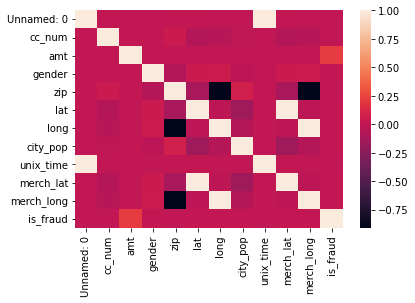

In [ ]:
# Amount is highly correlated to fraud
sns.heatmap(X.corr())

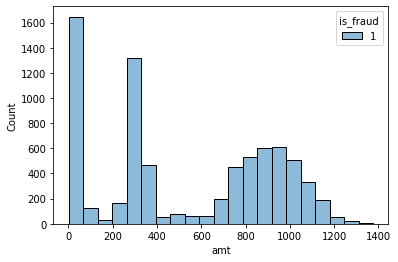

In [ ]:
# Fraud activity occurs within these distributions
sns.histplot(data=X[X.is_fraud == 1], x='amt', hue='is_fraud')

In [ ]:
# Fraud activity occurs mainly btw the 75% and max
X.amt.describe() - X[X.is_fraud == 1].amt.describe()

count    1.289169e+06
mean    -4.609691e+02
std     -2.302440e+02
min     -6.000000e-02
25%     -2.360125e+02
50%     -3.489850e+02
75%     -8.177350e+02
max      2.757286e+04
Name: amt, dtype: float64

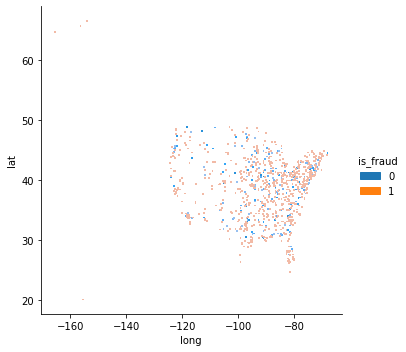

In [ ]:
# Where are they happening in the US?
# Looks proportionate to number of transactions
sns.displot(data=X, x='long', y='lat', hue='is_fraud')

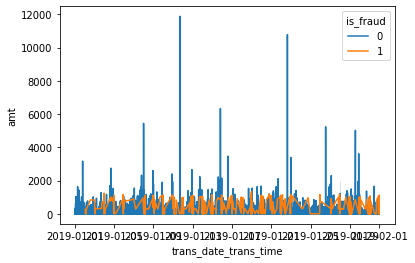

In [ ]:
# Can we visually see a correlation between date and the frequency of fraud transactions?
# A: Not really, they stay below a certain threshold however.
X.trans_date_trans_time = pd.to_datetime(X.trans_date_trans_time, infer_datetime_format=True) 
sns.lineplot(data=X[X.trans_date_trans_time < "2019-02-01 00:00:00"], x='trans_date_trans_time', y='amt', hue='is_fraud')

In [31]:
# Number of unique jobs? (Should we encode them?)
# A: No
X.job.nunique()

494

### Transform and Prepare Data

In [14]:
# Models and metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# Sampling
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [15]:
# Read in data
X = pd.read_csv('fraudTrain.csv')
y = pd.read_csv('fraudTest.csv')

In [16]:
# Encode genders
X.gender = pd.get_dummies(X.gender, drop_first=True).rename(columns={'M':'gender'})
y.gender = pd.get_dummies(y.gender, drop_first=True).rename(columns={'M':'gender'})

In [17]:
# Drop columns not working with (mostly object type columns)
drop = ['Unnamed: 0','cc_num','merchant', 'category','first', 'last','street', 'city', 'state', 'zip','job', 'dob', 'trans_num', 'unix_time','trans_date_trans_time']
X.drop(columns=drop, inplace=True)
y.drop(columns=drop, inplace=True)

In [18]:
# Reformat data
df = pd.concat([X,y])
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Normalize data
mms = MinMaxScaler().fit(X)
X = mms.transform(X)

In [19]:
# Shuffle and split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=.7)

In [20]:
# print("Start:", Counter(y_train))
# over = RandomOverSampler(sampling_strategy=0.11)
# X_train, y_train = over.fit_resample(X_train, y_train)
# print("Oversampling: ", Counter(y_train))
# under = RandomUnderSampler(sampling_strategy=0.5)
# X_train, y_train = under.fit_resample(X_train, y_train)
# print("Undersampling: ", Counter(y_train))

Start: Counter({0: 1289962, 1: 6713})
Oversampling:  Counter({0: 1289962, 1: 141895})
Undersampling:  Counter({0: 283790, 1: 141895})


### Model Analysis
> For model analysis we must remember what problem we are trying to solve. In this case we are trying to classify fraud transactions. In terms of risks and rewards, we want to catch all (if we can) instances of fraud and not mind the repercussions of over classification. We need to really pay attention to recall, but in a real world setting, we still need to be sensitve to the precision because we don't want to annoy customers. 

> In terms of results, we have three models that have been trained that each have their strengths and weaknessess. Pay close attention to the heat matrix since it will tell you explicitly how many of each class it predicted correctly and how many of each class it classified incorrectly.

For a good idea on how to interpret each metric use [this](https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec) article as a resource.


              precision    recall  f1-score   support

           0       1.00      0.65      0.78    552781
           1       0.01      0.99      0.03      2938

    accuracy                           0.65    555719
   macro avg       0.51      0.82      0.41    555719
weighted avg       0.99      0.65      0.78    555719



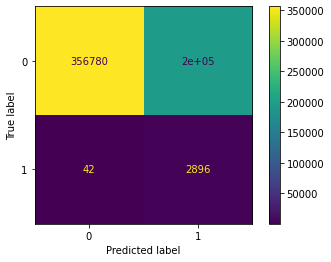

In [24]:
xgb = XGBClassifier(scale_pos_weight=20)
xgb.fit(X_train,y_train)
y_hat = xgb.predict(X_test)
print(classification_report(y_test, y_hat))
cm = confusion_matrix(y_test, y_hat, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    552781
           1       0.36      0.61      0.45      2938

    accuracy                           0.99    555719
   macro avg       0.68      0.80      0.72    555719
weighted avg       0.99      0.99      0.99    555719



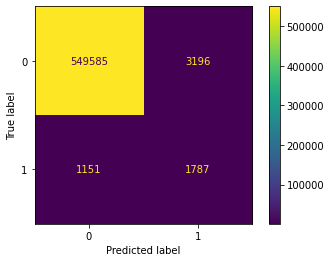

In [25]:
xgb = RandomForestClassifier()
xgb.fit(X_train,y_train)
y_hat = xgb.predict(X_test)
print(classification_report(y_test, y_hat))
cm = confusion_matrix(y_test, y_hat, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.74      0.85    552781
           1       0.02      0.97      0.04      2938

    accuracy                           0.74    555719
   macro avg       0.51      0.85      0.44    555719
weighted avg       0.99      0.74      0.85    555719



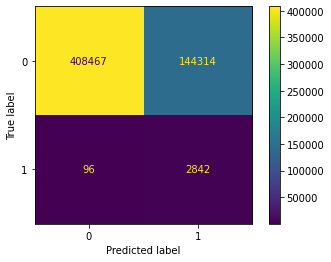

In [26]:
xgb = LGBMClassifier(boosting_type='goss',scale_pos_weight=20)
xgb.fit(X_train,y_train)
y_hat = xgb.predict(X_test)
print(classification_report(y_test, y_hat))
cm = confusion_matrix(y_test, y_hat, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()